# EXOVIS


A single night at a professional telescope can cost up to $70k AUD. For this reason astronomers need to plan very carefully their observational campaigns.
Using Lomb-Scargle periodogram and Monte Carlo simulations, **Exovis** calculates the probability to detect a planet as a function of the following parameters:
- Pysical properties of the planet;
- Pysical properties of the hosting star;
- Expected precision in radial velocity;
- Number and cadence of observations.

In [1]:
from simplanet import *
from simul import *
from kepler import *
from MCsim import *


## Do it for a single planet
### Define the planet
Assume the following properties of the planet and the hosting star.

In [14]:
M_star = 1. # Mass of the hosting star (Sun masses)
M_planet = 10. # Mass of the planet (Earth masses)
Period = 30. # Period of planet's orbit (days)
ecc = 0.1 # Eccentricity of planet's orbit
w = 0 # Inclination of the orbit (radiants)

planet=Planet(M_star, M_planet, Period, ecc, w)

Planet successfully created.


### Define the observations

In [15]:
N_obs = 30 # Number of observations
time_range = 100 # Total amount of time over which the observations are randomly distributed
precision_RV = 1  # Expected precision for radial velocity

observations=Observations(N_obs,time_range,precision_RV)

Observational strategy successfully created.


### Simulate observations
Simplanet function simulates the observations given the parameters that I have specified above.

In [16]:
simplanet(planet,observations)

Now I can plot the simulated RV measurements as a function of time.

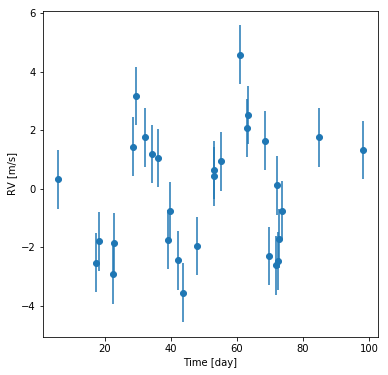

In [17]:
plot_observations(observations)


### Check visibility
Now I can use a LS periodogram to check the visibility of the planet.

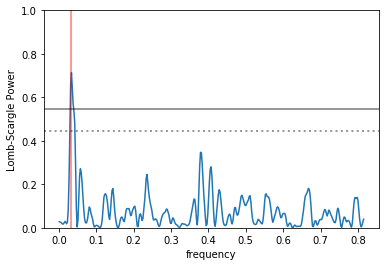

In [18]:
plot_LombScargle(planet,observations)


In [19]:
vis = visibility(planet,observations)
print("Is the planet detected? {}".format(vis))

Is the planet detected? True


The planet is successfully detected. Now let simulate more planets at once.

## Do it for a grid of plenets
### Define the range of physical properties

Now I define the possible physical properties of the planets and the number of planets that I want to simulate.

In [23]:
Mp_min=1 # minimum mass of the planet
Mp_max=30 # maximum mass of the planet
P_min=3 # minimum period of the orbit
P_max=300 # maximum period of the orbit
Ms=1 #mass of the hosting star
e=0.01 #eccentricity of the orbit
Niter=100 # number of plents that I want to simulate

In [24]:
Data=MCsim(observations,Mp_min,Mp_max,P_min,P_max,Ms,e,Niter)

Now I can check which planets I would be able to detect.

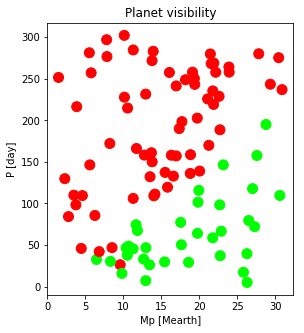

In [25]:
plot_MCsim(Data)

The green circles identify the planets that I can successfully identify.